In [10]:
import torch
import torchvision

In [11]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = True
torch.manual_seed(random_seed)

In [12]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [13]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [14]:
example_data.shape

torch.Size([1000, 1, 28, 28])

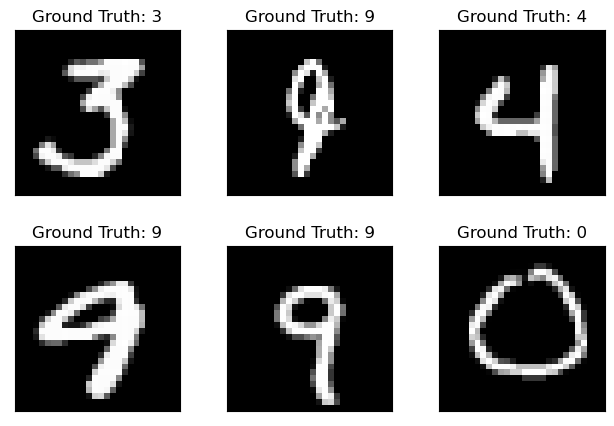

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])

In [16]:
import torch.nn as nn
import torch.nn.functional as F

## Define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(512, 512)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(512, 10)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [17]:
## Specify loss and optimization functions

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [18]:
# number of epochs to train the model
n_epochs = 30  # suggest training between 20-50 epochs

model.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1,train_loss))

Epoch: 1 	Training Loss: 0.624312
Epoch: 2 	Training Loss: 0.335212
Epoch: 3 	Training Loss: 0.313196
Epoch: 4 	Training Loss: 0.301595
Epoch: 5 	Training Loss: 0.294252
Epoch: 6 	Training Loss: 0.288972
Epoch: 7 	Training Loss: 0.284445
Epoch: 8 	Training Loss: 0.281338
Epoch: 9 	Training Loss: 0.278557
Epoch: 10 	Training Loss: 0.275954
Epoch: 11 	Training Loss: 0.273840
Epoch: 12 	Training Loss: 0.272079
Epoch: 13 	Training Loss: 0.270582
Epoch: 14 	Training Loss: 0.269016
Epoch: 15 	Training Loss: 0.267343
Epoch: 16 	Training Loss: 0.266348
Epoch: 17 	Training Loss: 0.265187
Epoch: 18 	Training Loss: 0.264164
Epoch: 19 	Training Loss: 0.263101
Epoch: 20 	Training Loss: 0.262048
Epoch: 21 	Training Loss: 0.261052
Epoch: 22 	Training Loss: 0.260503
Epoch: 23 	Training Loss: 0.259450
Epoch: 24 	Training Loss: 0.258929
Epoch: 25 	Training Loss: 0.258272
Epoch: 26 	Training Loss: 0.257686
Epoch: 27 	Training Loss: 0.256867
Epoch: 28 	Training Loss: 0.256457
Epoch: 29 	Training Loss: 0.2

In [19]:
from PIL import Image
from torch import nn, save, load

In [22]:
with open('model_state.pt', 'wb') as f: 
    save(model.state_dict(), f) 

In [23]:
with open('model_state.pt', 'rb') as f: 
    model.load_state_dict(load(f))

In [28]:
from torchvision.transforms import ToTensor

img = Image.open('img_3.jpg') 
img_tensor = ToTensor()(img).unsqueeze(0)

print(torch.argmax(model(img_tensor)))

tensor(9)
